# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision.datasets import ImageFolder
from tqdm import tqdm


In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(42)

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 08:50:23--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 08:50:24--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1195dbd8039bf3a91c1a614c0d.dl.dropboxusercontent.com/cd/0/get/CHyglj_TcKpk6uXOX9a6yTNudloWw9QbybZI-mEpYaxGvh6YuRf_3u6WWuYVZdUa9MCroPQck9AGsQfi3wIZifTTneuElcpTbcRed612qRsD0YBM9wQC4Cg1W3iBkZ_evQfmxDAov09WaRFHEjWswO4T/file?dl=1# [following]
--2023-11-18 08:50:24--  https://uc1195dbd8039bf3a91c1a614c0d.dl.dropboxusercontent.com/cd/0/get/CHyglj_TcKpk6uXOX9a6yTNudloWw9QbybZI-mEpYaxGvh6YuRf_3u6WWuYVZdUa9MCroPQck9AGsQfi3wIZifTTneuElcpTbcRed

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

---

## **История о том, как я купил Colab Pro из России или как выбить нужное качество за 2 дня...**

Как и прошлое дз, работа предполагает отчет (даже 2!). Я безусловно вынесу часть архитектур и мыслей в специально отведенные под то блоки, но ниже и далее будет много лирических отступлений. Так что если располагаете временем, советую заварить чай, должно быть весьма увлекательно! Впереди, как оказалось, будет много экспериментов!



### Подготовка данных

К своему удивлению я застрял на самом 1-м этапе и долго провозился с тем, что гуглил про **нормализацию изображений**. В большинстве статей параметры *Normalize()* были просто захардкоЖены 👍

Действительно, для многих учебных датасетов параметры *mean* и *std* уже рассчитаны, а значит и в реализации их подсчета нет необходимости.

Чуть позже наткнулся на [интересный ответ](https://stackoverflow.com/questions/62111708/what-is-the-significance-of-normalization-of-data-before-feeding-it-to-a-ml-dl-m) на стаковере. Здесь говорилось и про причины (например - возможный взрыв градиентов), и про варианты имплементации.

По результатам прочтения еще ряда форумов, статей и диалога с ментором (*парень на 2м курсе ШАДа, как никак чето понимает за DS и CV в частности* 👀) я пришел к выводу, что главное - перевести пиксели изображений на интервал [0, 1] или [-1, 1], хотя и это кажется необязательным, **если внутри архитектуры первым слоем будет какой-нибудь BathNorm**. В общем **идея в том**, чтобы не гнаться за нормальным распределением, а перевести всё в нужный диапазон!

В [обсуждении](https://discuss.pytorch.org/t/understanding-transform-normalize/21730/3) был предложен вариант задать параметры так: *Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))*

Это и правда преобразует значения в тензорах на отрезок [-1; 1], **но только при условии, что они уже от 0 до 1!**

Проверим, как обстоят у нас дела изначально:

In [ ]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
for batch in train_dataloader:
    images, class_nums = batch
    break

torch.min(images[0]), torch.max(images[0])

(tensor(0.), tensor(1.))

Отлично! Получается, не нужно нормировать на 255 весь наш датасет)

Ниже делаю необходимый *prepocessing* данных. Почитал про **albumentation**, вещь прикольная, но зачем усложнять себе жизнь (и так делаю за 2 дня до жесткого дд...), когда необходимый минимум можно взять из того же [*torchvision*](https://pytorch.org/vision/stable/transforms.html). Для нашей задачи думаю вполне и его хватит:

In [ ]:
train_transform = transforms.Compose(
    [
        transforms.RandomGrayscale(0.2),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # расписал выше почему так
    ]
)

val_transform = transforms.Compose(
    [
        torchvision.transforms.ToTensor(), # валидацию никак не трогаем
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

Сначала я как-то скептически воспринял аугментацию — впоследствии очень даже пожалел. Думал хватит пары поворотов, а в итоге пришлось добавить еще пару фишек. Экспериментировал также с *RandomErase* и *Gaussian Blur*. Но как видно, в итоговую версию они не вошли)

In [ ]:
train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

In [ ]:
seed_everything(42)

train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle=True, pin_memory=True) # батчсайз по классике
val_dataloader = DataLoader(val_dataset, batch_size = 2048, shuffle=False)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

Посмотрел, теперь коммент на это дело, чтобы не раздувать ноутбук

In [ ]:
# for batch in train_dataloader:
#     images, class_nums = batch
#     plt.imshow(images[5].permute(1, 2, 0))
#     plt.show()
#     plt.imshow(images[19].permute(1, 2, 0))
#     plt.show()
#     break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Сначала у меня было огромное желание лепить модельку самому, поиграться с архитектурой. Но побоялся, что с моим энтузиазмом можно заиграться и пролететь даже жесткий дд... Потому возьмем что-нибудь готовенькое и внимательно это изучим!

Что делаем? Идем на **сайт продвинутых машинлернеров**: https://paperswithcode.com/sota

Сейчас будем как в супермаркете выбирать! Image Classification > ImageNet. Главное случайно не спулить какой-нибудь трансформер...

### **Спойлер**:

Я перепробовал много архитектур, наверное неудачные с кодом вынесу в самый низ. ResNet, RegNet, ConvNeXt, DenseNet и другие. В итоге остановился как раз на densenet121. Пробовал и 169-ю и 201-ю, но все эти сетки более тяжелые, дольше обучаются, а в качестве улучшения не увидел.

Напишем код обучения для нашей (нет) модельки:

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

Будем рисовать графики по ходу обучения чтобы мониторить ситуацию. Почему не wandb? Штука хорошая, поначалу даже ей и пользовался! Но т.к. приходилось часто стопать модельку после 1-2 эпох, в ряде случаев повторный запуск просто не удавался, так как waiting for wandb.init() ✌

In [ ]:
def plot_history(train_history, val_history, title="loss"):
    plt.figure()
    plt.title(title)
    plt.plot(train_history, label="train", zorder=1)

    points = np.array(val_history)
    steps = list(
        range(0, len(train_history) + 1, int(len(train_history) / len(val_history)))
    )[1:]

    plt.scatter(
        steps, val_history, marker="+", s=180, c="orange", label="val", zorder=2
    )
    plt.xlabel("train steps")

    plt.legend(loc="best")
    plt.grid()

    plt.show()

In [ ]:
from IPython.display import clear_output

Код обучения заимствую с общего [семинара](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/03.%20Image%20Classification/03_Image_Classification.ipynb) (с *исправленным расчетом лосса!*) Там кажется должны были писать в **преподавательский чатик** 15-16 ноября насчет бага в расчете loss`а. Это всё я суеты навел... 😇

In [ ]:
def train_(
    train_dataloader, val_dataloader,
    optimizer, model, criterion, scheduler, device):
    train_loss_log, train_acc_log, val_loss_log, val_acc_log = [], [], [], []

    for epoch in range(30):
        # тренировка
        train_epoch_loss, train_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.train()
        for imgs, labels in tqdm(
            train_dataloader, desc=f"Training, epoch {epoch+1}", leave=False
        ):
            imgs, labels = imgs.to(device), labels.to(device)

            y_pred = model(imgs)
            loss = criterion(y_pred, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # log loss for the current epoch and the whole training history
            train_epoch_loss = torch.cat(
                (train_epoch_loss, loss.cpu().unsqueeze(0))
            )
            train_loss_log.append(loss.cpu().data)

            # log accuracy for the current epoch and the whole training history
            pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
            train_epoch_true_hits = torch.cat(
                (
                    train_epoch_true_hits,
                    (pred_classes == labels.cpu()).sum().unsqueeze(0),
                )
            )
            train_acc_log.append(
                (pred_classes == labels.cpu()).sum() / labels.cpu().shape[0]
            )

        # валидация
        val_epoch_loss, val_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.eval()
        with torch.no_grad():
            for imgs, labels in tqdm(
                val_dataloader, desc=f"Validating, epoch {epoch+1}", leave=False
            ):
                imgs, labels = imgs.to(device), labels.to(device)

                y_pred = model(imgs)
                loss = criterion(y_pred, labels)
                val_epoch_loss = torch.cat(
                    (val_epoch_loss, loss.cpu().unsqueeze(0))
                )

                pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
                val_epoch_true_hits = torch.cat(
                    (
                        val_epoch_true_hits,
                        (pred_classes == labels.cpu()).sum().unsqueeze(0),
                    )
                )

        val_loss_log.append(val_epoch_loss.mean())
        val_acc_log.append(
            val_epoch_true_hits.sum()
            / val_epoch_true_hits.size(0)
            / val_dataloader.batch_size
        )


        if scheduler:
          scheduler.step()

        clear_output()
        plot_history(train_loss_log, val_loss_log, "loss")
        plot_history(train_acc_log, val_acc_log, "accuracy")

        print(f'--------Epoch {epoch+1}-------')
        print("Train loss:", train_epoch_loss.mean().item())
        print(
            "Train acc:",
            (
                train_epoch_true_hits.sum()
                / train_epoch_true_hits.size(0)
                / train_dataloader.batch_size
            ).item(),
        )
        print("Val loss:", val_epoch_loss.mean().item())
        print(
            "Val acc:",
            (
                val_epoch_true_hits.sum()
                / val_epoch_true_hits.size(0)
                / val_dataloader.batch_size
            ).item(),
        )

        if val_acc_log[-1] > 0.44:
          break

А вот и наша топ модель! Посмотрим, что там под капотом!

In [ ]:
from torchvision.models import densenet121
densenet121()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

А вот один из не самых удачных экспериментов. Здесь добавлял дропаут (посмотрел как в конструктуре задается класс модельки в [документации](https://pytorch.org/vision/main/_modules/torchvision/models/densenet.html#densenet121))



```
model = densenet121(drop_rate=0.1, num_classes=200)

model = model.to(device)
model.apply(initialize_weightsX_)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.75, weight_decay=0.0007)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max", patience=2, factor=0.2)
criterion = nn.CrossEntropyLoss()
```



График по этому запуску будет в самом низу (надеюсь ничего не потеряется). Такими настройками я выбил чуть больше 0.24 и остановил обучение, т.к. старт был так себе.

### **Что можно подметить?**

Здесь и далее использал неслучайную инициализацию весов. **Прежде чем прибегнуть** к таким фокусам я на всякий случай уточнил (у семинариста и одного из ассистентов) правомерность их использования именно в 1м номере.

### **Зачем такая штука?**



Есть разные подходы к инициализации весов при использовании градиентных методов обучения. В классическом ML распространена практика делать это из нормального / равномерного распределения. В случае сеток (особенно **глубоких!**) такое обречено на провал – распределение активации (выходов с каждого слоя) по мере прямого прохода будет вырождаться в 0, т.е. стягиваться в нулю:

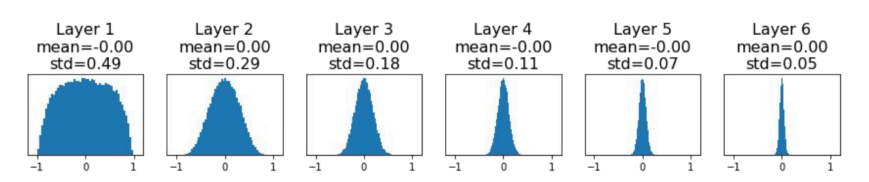

Картинка выше взята с лекции 7 [курса по нейроночкам от Филлипа](https://github.com/FUlyankin/deep_learning_pytorch/blob/main/README.md), а он в свою очередь брал ее с какого-то Стэнфордского курса 🤙




Таким образом, в backprop мы получаем маленькие значения градиентов и сетка просто развалится. В случае использования симметричных функций активаций может произойти *поляризация* >> насыщение градиентов >> их зануление:

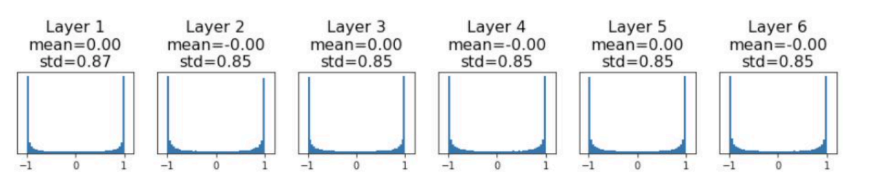

Мы хотим, чтобы дисперсия выхода не сильно отличалась от дисперсии входа по мере движения по слоям. Здесь на помощь и приходят инициализация Ксавье / Глорота, [англ статья на эту тему тут](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

Вообще в прошлой дз я уже использовал эту тему весьма успешно, но тогда еще не успел вникнуть в механику процесса, т.к. это подсказали коллеги на работе в стиле "делай так"... 😀

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.kaiming_uniform_(m.weight.data)

In [ ]:
def initialize_weightsX_(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

Подробнее про всё это дело есть [тут](https://pytorch.org/docs/stable/nn.init.html). Единственно в имплементации PyTorch я не нашел инициализацию Xe. Потому как, если не ошибаюсь, Ксавье для симметричной активации, а если мы посмотрим чуть выше – в нашей модельке везде ReLU. Ну да ладно, главное что работает!

### **NB:**

Чуть позже я правда выяснил, что делать это было необязательно – мне стало интересно, как инициализируются веса, если модель запускается непредобученной. Пришлось зарыться чуть глубже, чем просто страничка модельки на пайторче, ушел смотреть [опенсорсный код на гитхабе](https://github.com/pytorch/vision/blob/main/torchvision/models/densenet.py)



```
for m in self.modules():
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):
        nn.init.constant_(m.bias, 0)
```



В общем те, кто собирал модель явно не дураки и всё сделали красиво ⚡

Ниже приведена победная модель. Рад что не вкорячил *early stopping* ибо так я бы вряд ли дошел до заветных 0.44!



```
"Терпение - это ключевой элемент успеха"
                                    Билл Гейтс
```



Не зря подождал лишние полчаса пока модель вынырнет ✅

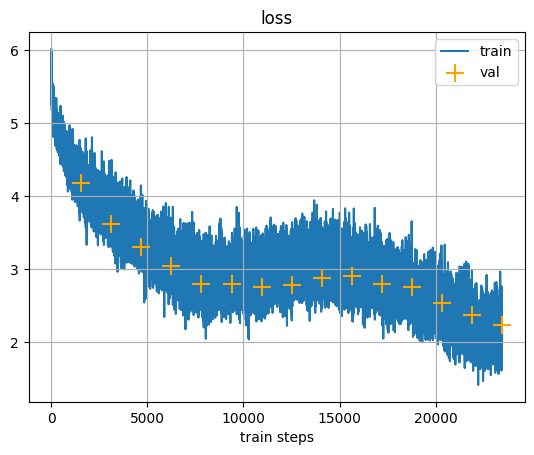

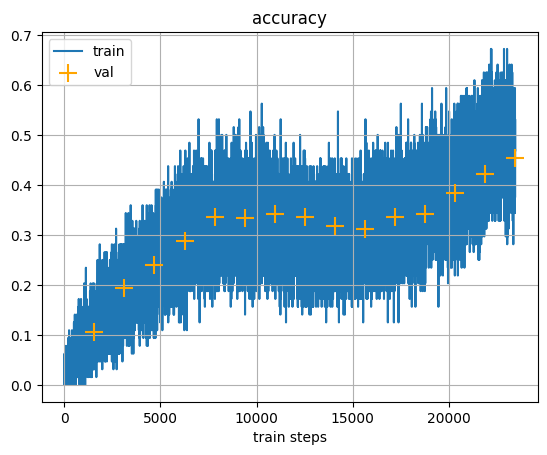

--------Epoch 15-------
Train loss: 2.1509690284729004
Train acc: 0.47474807500839233
Val loss: 2.22995662689209
Val acc: 0.4546875059604645


In [ ]:
model = densenet121()
model = densenet121(num_classes=200)

model = model.to(device)
model.apply(initialize_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)
criterion = nn.CrossEntropyLoss()

train_(
    train_dataloader, val_dataloader,
    optimizer, model, criterion, scheduler, device)

In [ ]:
torch.save(c.state_dict(), 'hw2_model_1')

### Валидация результатов задания

Я чуть переписал функцию, чтобы она работа с моей моделью, ибо я писал не на lightning, по сути просто скопировал код из валидации, где идет расчет accuracy:

In [ ]:
def evaluate_task(model, test_dataloader):

    val_epoch_true_hits = torch.empty(0)

    model.eval()
    with torch.no_grad():
        for imgs, labels in tqdm(
            test_dataloader, desc=f"Validating", leave=False
        ):
            imgs, labels = imgs.to(device), labels.to(device)

            y_pred = model(imgs)

            pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
            val_epoch_true_hits = torch.cat(
                (
                    val_epoch_true_hits,
                    (pred_classes == labels.cpu()).sum().unsqueeze(0),
                )
            )

    accuracy = (
        val_epoch_true_hits.sum()
        / val_epoch_true_hits.size(0)
        / val_dataloader.batch_size
    )

    return accuracy

In [ ]:
accuracy = evaluate_task(model.to(device), val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

Оценка за это задание составит 10.00 баллов


In [ ]:
accuracy

tensor(0.4547)

---

### **Краткое summary**:

Не знаю, чтобы я делал без Colab Pro. Экспериментов хочется поставить много, но модели учатся долго, без подписки коллаб часто отваливался, обучение падало. Я даже обучал на двух ноутбуках (распараллелил процесс xdd). Но быстро пришло понимание, что даже так сдача в жесткий дд под вопросом... Головная боль и правда проходит с Pro подпиской, хоть модели быстрее обучаться не стали (логично, я ведь остался на T4), т.к. A100 и V100 ели очень много единиц в час, на это было больно смотреть))

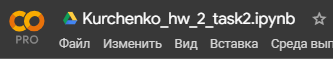

---

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх



```
train_transform = transforms.Compose(
    [
        transforms.RandomGrayscale(0.2),
        # transforms.Resize(240),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

val_transform = transforms.Compose(
    [
        torchvision.transforms.ToTensor(), # валидацию никак не трогаем
        # transforms.Resize(240),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
```



Изначально, ознакомившись с заданием, я был уверен, что тут неявно предполагается поиграться с Transferlearning. Т.е. в самом базовом варианте: **замораживаем веса предобученной модели**, прикручиваем нужную голову в виде 2х-3х FC и вуаля. Но я давно так не ошибался... Такое предположение стоило мне нескольких бессмысленных запусков. А делал я следующее:



```
from torchvision.models import densenet169

model_JJ = densenet169(weights='IMAGENET1K_V1')

for param in model_JJ.parameters():
    param.requires_grad = False


model_JJ.classifier = nn.Linear(1920, 200)
model_JJ = model_JJ.to(device)
```



Я не понимал, почему качество растет так медленно и так плохо. Это продолжалось до тех пор пока я случайно не запустил обучение очередной модели без заморозки весов... Accuracy уже после 1-й эпохи было за 0.3+...

Тогда и стало понятно, в какую сторону предстоит двигаться. Спустя еще несколько не очень удачных запусков я наконец понял, что хорошо работает `resize`, не зря же про него было упомянуто в самом задании.

In [ ]:
from IPython.display import clear_output

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

Но перед этим было опробавно еще ряд вариантов. Вернее даже подходов: я брал и лепил более сложную голову, чем просто 1 FC, например так:



```
efficientnet_b1 = torchvision.models.efficientnet_b1(weights='IMAGENET1K_V1')

optimizer = torch.optim.SGD(
    efficientnet_b1.parameters(), lr=0.001, weight_decay=1e-4, momentum=0.9)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

efficientnet_b1.classifier[1] = nn.Sequential(nn.Linear(1280, 800),
                                              nn.BatchNorm1d(800),
                                              nn.LeakyReLU(), nn.Dropout(0.1),
                                              nn.Linear(800, 400), nn.BatchNorm1d(400),
                                              nn.SELU(), nn.Linear(400, 200))
```



Результат получался отличный, на 10 баллов! Всё бы хорошо, но 10 баллов по меркам 1-го задания ⛄

Вообще я уже немного подустал описывать ход работы... Потому чуть ускоримся) Ниже спулил тот же код обучения, но впихнул эпохи как экзогенный параметр (не знаю почему в прошлый раз сразу это не добавил, но пусть так) + изменил порог выхода на 0.84

In [ ]:
def train_3(
    train_dataloader, val_dataloader,
    optimizer, model, criterion, scheduler, device, epochs):
    train_loss_log, train_acc_log, val_loss_log, val_acc_log = [], [], [], []

    for epoch in range(epochs):
        train_epoch_loss, train_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.train()
        for imgs, labels in tqdm(
            train_dataloader, desc=f"Training, epoch {epoch+1}", leave=False
        ):
            imgs, labels = imgs.to(device), labels.to(device)

            y_pred = model(imgs)
            loss = criterion(y_pred, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_epoch_loss = torch.cat(
                (train_epoch_loss, loss.cpu().unsqueeze(0))
            )
            train_loss_log.append(loss.cpu().data)

            pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
            train_epoch_true_hits = torch.cat(
                (
                    train_epoch_true_hits,
                    (pred_classes == labels.cpu()).sum().unsqueeze(0),
                )
            )
            train_acc_log.append(
                (pred_classes == labels.cpu()).sum() / labels.cpu().shape[0]
            )

        val_epoch_loss, val_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.eval()
        with torch.no_grad():
            for imgs, labels in tqdm(
                val_dataloader, desc=f"Validating, epoch {epoch+1}", leave=False
            ):
                imgs, labels = imgs.to(device), labels.to(device)

                y_pred = model(imgs)
                loss = criterion(y_pred, labels)
                val_epoch_loss = torch.cat(
                    (val_epoch_loss, loss.cpu().unsqueeze(0))
                )

                pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
                val_epoch_true_hits = torch.cat(
                    (
                        val_epoch_true_hits,
                        (pred_classes == labels.cpu()).sum().unsqueeze(0),
                    )
                )

        val_loss_log.append(val_epoch_loss.mean())
        val_acc_log.append(
            val_epoch_true_hits.sum()
            / val_epoch_true_hits.size(0)
            / val_dataloader.batch_size
        )


        if scheduler:
            scheduler.step()

        clear_output()
        plot_history(train_loss_log, val_loss_log, "loss")
        plot_history(train_acc_log, val_acc_log, "accuracy")

        print(f'--------Epoch {epoch+1}-------')
        print("Train loss:", train_epoch_loss.mean().item())
        print(
            "Train acc:",
            (
                train_epoch_true_hits.sum()
                / train_epoch_true_hits.size(0)
                / train_dataloader.batch_size
            ).item(),
        )
        print("Val loss:", val_epoch_loss.mean().item())
        print(
            "Val acc:",
            (
                val_epoch_true_hits.sum()
                / val_epoch_true_hits.size(0)
                / val_dataloader.batch_size
            ).item(),
        )

        if val_acc_log[-1] > 0.84:
            break

    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

Поработаем с картиночками:

In [ ]:
train_transform = transforms.Compose(
    [
        transforms.Resize(255),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Resize(255),
        torchvision.transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

Здесь необходимо очередное пояснение откуда эти числа все. Если кратно, то [отсюда](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b1.html). Почему они такие и зачем они здесь? Всё просто – мы хотим притянуть распределение наших картинок (вернее их пикселей) к тому, на котором модель обучалась. Это надо, чтобы наша модель не сошла с ума (и мы вместе с ней) на новых данных :D
Приведу рукописную иллюстрацию:

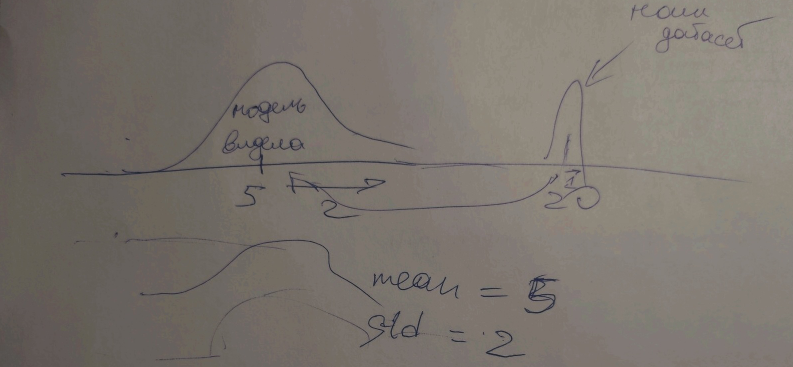





Теперь насчет `resize`: к своему удивлению я не нашел хороших статей, где бы говорилось, что *upscaling* бустит accuracy и модель в целом. Скорее, ожидался даже обратный эффект.

Я пробовал разные варианты ресайза: 64, 128, 220, 255. На удивление лучшие результат выбил именно на 128 (но модель остановил принудительно, т.к. ждать 30 эпох не вариант, график будет ниже)

In [ ]:
train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

#### **Еще немного эмпирических наблюдений:**

Очевидно, что с растягиванием изображения увеличивается размер векторного пространства, тензоры больше и тд что закономерно увеливает время танцев одной эпохи...
Но то, что ощутили многие - так это гпу забивается в потолок и умирает, если неправильно подобрана пара батчсайз - ресайз)




```
import gc
torch.cuda.empty_cache()
gc.collect()
```



Тема выше помогала ее периодически чистить

In [ ]:
seed_everything(42)

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle=True) # батчсайз (не) по классике
val_dataloader = DataLoader(val_dataset, batch_size = 512, shuffle=False)

Результат который удалось сохранить. Здесь я прикрутил мощную голову, прям таки змей-горыныч с 3мя головами

In [ ]:
efficientnet_b1 = torchvision.models.efficientnet_b1(weights='IMAGENET1K_V1')

efficientnet_b1.classifier[1] = nn.Sequential(nn.Linear(1280, 800),
                                              nn.BatchNorm1d(800),
                                              nn.LeakyReLU(),
                                              nn.Dropout(0.1),
                                              nn.Linear(800, 400),
                                              nn.BatchNorm1d(400),
                                              nn.LeakyReLU(),
                                              nn.Linear(400, 200))

efficientnet_b1.to(device)

Результат победным не стал к сожалению. Использовал **SGD** + **momentum** в сочетании с шедулером, который по косинусу меняет шаги.

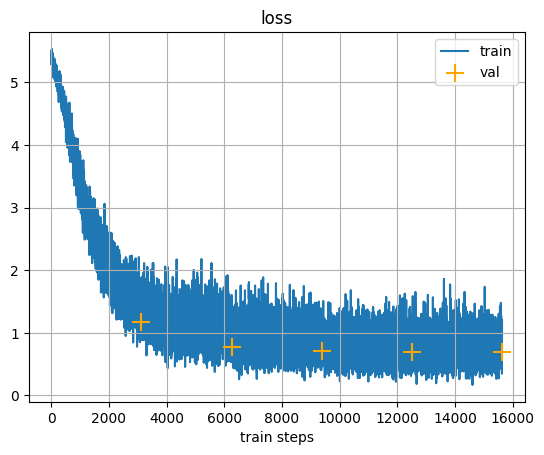

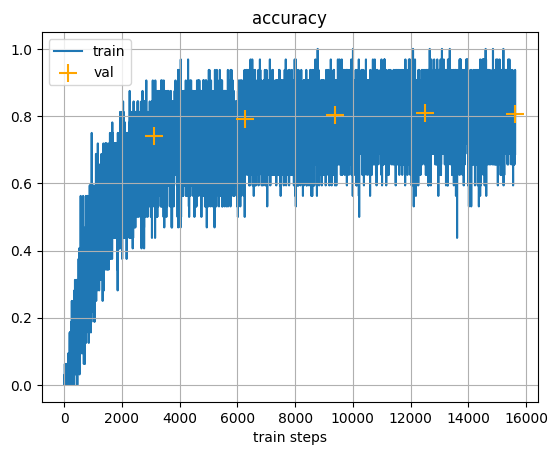

--------Epoch 5-------
Train loss: 0.7590943574905396
Train acc: 0.8073800206184387
Val loss: 0.6920042037963867
Val acc: 0.8065429925918579


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    efficientnet_b1.parameters(), lr=0.001, weight_decay=1e-4, momentum=0.9
)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=4)

train_loss_log, train_acc_log, val_loss_log, val_acc_log  = train_3(
                                                                    train_dataloader, val_dataloader,
                                                                    optimizer, efficientnet_b1, criterion, scheduler, device, epochs=5
                                                                    )

Хотелось конечно зафиксировать что-то лучше. К тожу если удавалось достичь 0.818... Но к моменту написания сего уж прилично устал чтобы по новой гонять модельки (

Потому как есть:

In [ ]:
torch.save(efficientnet_b1.state_dict(), 'hw2_model_task2')

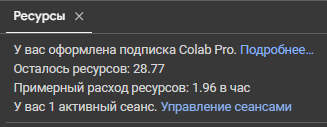

### Валидация результатов задания

In [ ]:
model = efficientnet_b1

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

Оценка за это задание составит 9.02 баллов


# Отчёт об экспериментах



Особо много писать не буду, так как вся работа = один большой отчет. Возможно не очень удобно с точки зрения быстрой проверки, но так хоть не теряется нить повествования в работе. Постарался раскрыть как теоретические моменты, так и описать сами эксперименты. Ниже в основном будут неудачные варианты, много кода. Единственное, что стоит внимание, так это самый первый график ниже. Даже не потому, что там best качество которое я выбил, а потому что все параметры запуска / предобработка и сам график остались сохранены и не тронутыми

### **Самая успешная из моделей, которая была принудительно остановлена**

In [ ]:
train_transform = transforms.Compose(
    [
        transforms.Resize(128),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), # расписал выше почему так
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Resize(128),
        torchvision.transforms.ToTensor(), # валидацию никак не трогаем
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

seed_everything(42)

train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size = 512, shuffle=False)

efficientnet_b1 = torchvision.models.efficientnet_b1(weights='IMAGENET1K_V1')
efficientnet_b1.classifier[1] = nn.Linear(1280, 200)
efficientnet_b1.to(device)

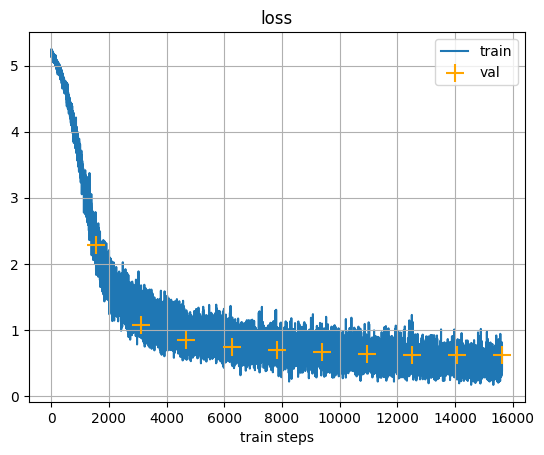

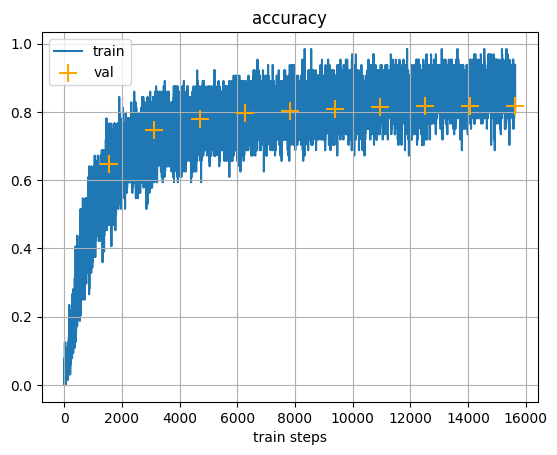

--------Epoch 10-------
Train loss: 0.49092376232147217
Train acc: 0.8679522275924683
Val loss: 0.6138620376586914
Val acc: 0.8177734613418579


KeyboardInterrupt: ignored

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    efficientnet_b1.parameters(), lr=0.0009, weight_decay=1e-4, momentum=0.9
)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

train_loss_log, train_acc_log, val_loss_log, val_acc_log  = train_2(
                                                                    train_dataloader, val_dataloader,
                                                                    optimizer, efficientnet_b1, criterion, scheduler, device
                                                                    )

---

Тут ошибка вышла на асимптоту, чуть не хватило, чтобы пробить потолок. Минус конечно всеего этого дела это долгое обучение, пока 1 эпоха доучится можно в магазин сходить. Ну и так еще из наблюдений, время очень быстро летит с ними. Я на 3 дня просто будто выпал из жизни (

Обучение затягивается до ночи и в результате, сам того не замечая, идешь спать в 4 утра... Это просто обман прогресс бара: видишь 3 минуты, кажется немного. Но эти минуты сливаются в часы, а там уже и рассвет...

Здорово, если кто-то дочитает до сюда... Значит, всё было не зря...

---

In [ ]:
# from torchvision.models import densenet201
# densenet201()
# model = densenet201()
# model.classifier = nn.Linear(in_features=1920, out_features=200, bias=True)

In [ ]:
# optimizer = torch.optim.SGD(model_Y.parameters(), lr=0.0122, momentum=0.75, weight_decay=0.0007)
# lambda1 = lambda epoch: 0.99 ** epoch
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

# # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)

In [ ]:
# model = densenet201()
# model.classifier = nn.Linear(in_features=1920, out_features=200, bias=True)
model = densenet121()
model = densenet121(drop_rate=0.1, num_classes=200)
# model.classifier = nn.Linear(in_features=1024, out_features=200, bias=True)

# model = resnet18()
# model.fc = nn.Linear(512, 200)

model = model.to(device)
model.apply(initialize_weightsX_)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.75, weight_decay=0.0007)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max", patience=2, factor=0.2)
criterion = nn.CrossEntropyLoss()

train_(
    train_dataloader, val_dataloader,
    optimizer, model, criterion, scheduler, device)

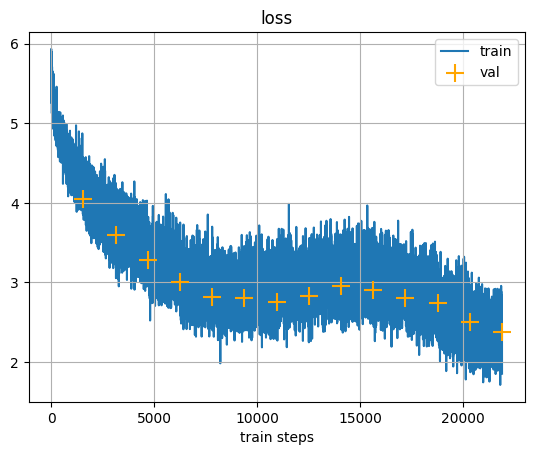

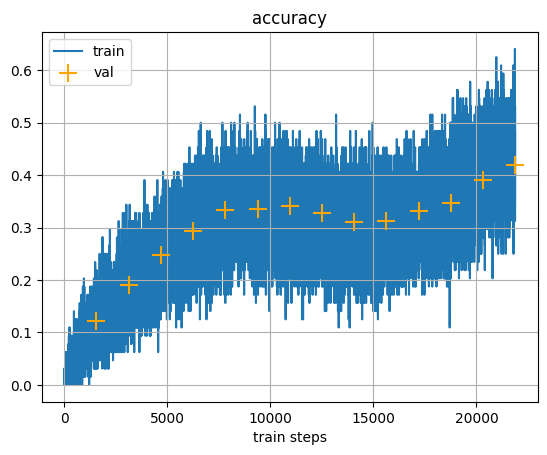

--------Epoch 14-------
Train loss: 2.3680429458618164
Train acc: 0.42655351758003235
Val loss: 2.372159004211426
Val acc: 0.41845703125


In [ ]:
# wandb.init(
#     project="conv-network3",
#     config={
#         "architecture": "DenseNet201",
#         "scheduler": 'None',
#         "epochs":  NUM_EPOCH
#     }
# )

# model = densenet201()
# model.classifier = nn.Linear(in_features=1920, out_features=200, bias=True)
model = densenet121()
model = densenet121(num_classes=200) # убрал дропы с 0.2
# model.classifier = nn.Linear(in_features=1024, out_features=200, bias=True)

# model = resnet18()
# model.fc = nn.Linear(512, 200)

model = model.to(device)
model.apply(initialize_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max", patience=2, factor=0.2)
criterion = nn.CrossEntropyLoss()

train_(
    train_dataloader, val_dataloader,
    optimizer, model, criterion, scheduler, device)

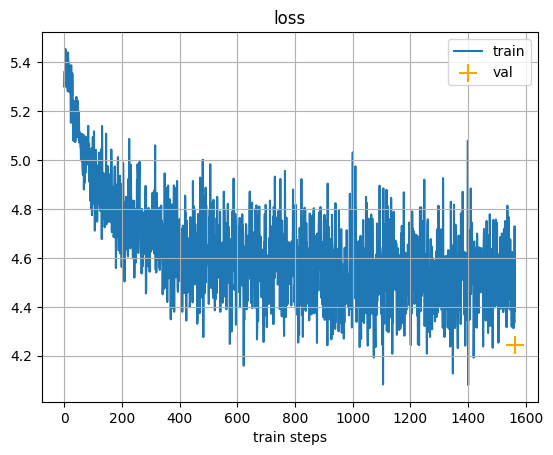

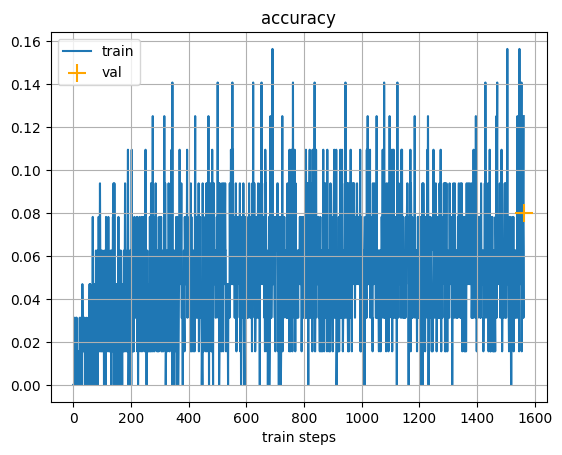

--------Epoch 1-------
Train loss: 4.6272406578063965
Train acc: 0.05158349499106407
Val loss: 4.243546962738037
Val acc: 0.080078125


KeyboardInterrupt: ignored

In [ ]:
# efficientnet_b1 = torchvision.models.efficientnet_b1(weights='IMAGENET1K_V1')

# efficientnet_b1.classifier[1] = nn.Linear(1280, 200)

optimizer = torch.optim.AdamW(efficientnet_b1.parameters(), lr=1e-3, momentum=0.9, weight_decay=1e-7) #weight_decay=1e-6
efficientnet_b1 = efficientnet_b1.to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=4)

criterion = nn.CrossEntropyLoss()

train_loss_log, train_acc_log, val_loss_log, val_acc_log  = train_2(
                                                                    train_dataloader, val_dataloader,
                                                                    optimizer, efficientnet_b1, criterion, scheduler, device
                                                                    )

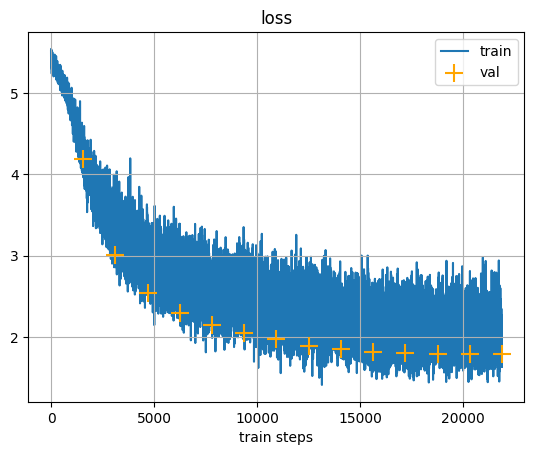

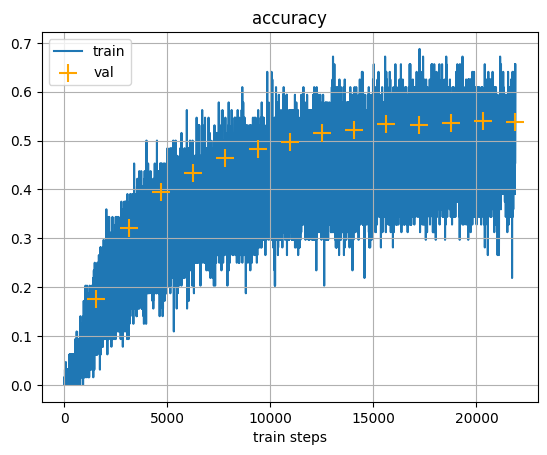

--------Epoch 14-------
Train loss: 2.097794532775879
Train acc: 0.482475608587265
Val loss: 1.7844951152801514
Val acc: 0.537890613079071


KeyboardInterrupt: ignored

In [ ]:
efficientnet_b1 = torchvision.models.efficientnet_b1(weights='IMAGENET1K_V1')
efficientnet_b1.classifier[1] = nn.Linear(1280, 200)

model_JJ = efficientnet_b1
model_JJ = model_JJ.to(device)

optimizer = torch.optim.AdamW(efficientnet_b1.parameters(), lr=1e-5, weight_decay=1e-6)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=4)
criterion = nn.CrossEntropyLoss()

train_loss_log, train_acc_log, val_loss_log, val_acc_log  = train_2(
                                                                    train_dataloader, val_dataloader,
                                                                    optimizer, efficientnet_b1, criterion, scheduler, device
                                                                    )